In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.pandas.set_option("display.max_columns",None)
#pd.pandas.set_option("display.max_rows",None)

In [2]:
data=pd.read_csv("student-mat.csv",sep=";")
data.head(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


# Exploratory data Analysis

# Description of Dataset

In [3]:
data.shape

(395, 33)

In [4]:
data.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
school        395 non-null object
sex           395 non-null object
age           395 non-null int64
address       395 non-null object
famsize       395 non-null object
Pstatus       395 non-null object
Medu          395 non-null int64
Fedu          395 non-null int64
Mjob          395 non-null object
Fjob          395 non-null object
reason        395 non-null object
guardian      395 non-null object
traveltime    395 non-null int64
studytime     395 non-null int64
failures      395 non-null int64
schoolsup     395 non-null object
famsup        395 non-null object
paid          395 non-null object
activities    395 non-null object
nursery       395 non-null object
higher        395 non-null object
internet      395 non-null object
romantic      395 non-null object
famrel        395 non-null int64
freetime      395 non-null int64
goout         395 non-null int64
Dalc          395 no

# Numerical features

In [6]:
numerical_features=[feature for feature in data.columns if data[feature].dtype!='object']

print("Number of Numeric Variables ",len(numerical_features))

data[numerical_features].head(5)

Number of Numeric Variables  16


,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,18,4,4,2,2,0,4,3,4,1,1,3,6,5,6,6
1,17,1,1,1,2,0,5,3,3,1,1,3,4,5,5,6
2,15,1,1,1,2,3,4,3,2,2,3,3,10,7,8,10
3,15,4,2,1,3,0,3,2,2,1,1,5,2,15,14,15
4,16,3,3,1,2,0,4,3,2,1,2,5,4,6,10,10


# Categorical Features

In [7]:
categorical_feature=[feature for feature in data.columns if data[feature].dtype=="object"]

print("Number of Categorical Variables ",len(categorical_feature))
data[categorical_feature].head(5)

Number of Categorical Variables  17


,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
0,GP,F,U,GT3,A,at_home,teacher,course,mother,yes,no,no,no,yes,yes,no,no
1,GP,F,U,GT3,T,at_home,other,course,father,no,yes,no,no,no,yes,yes,no
2,GP,F,U,LE3,T,at_home,other,other,mother,yes,no,yes,no,yes,yes,yes,no
3,GP,F,U,GT3,T,health,services,home,mother,no,yes,yes,yes,yes,yes,yes,yes
4,GP,F,U,GT3,T,other,other,home,father,no,yes,yes,no,yes,yes,no,no


# Impact of Numerical Features on Final Grade G3

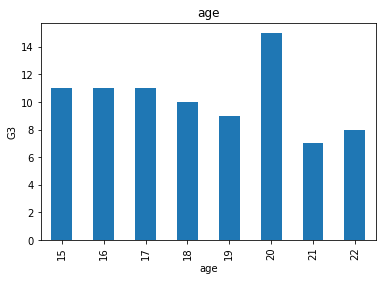

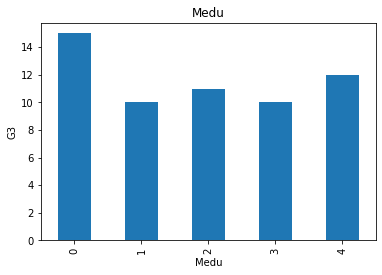

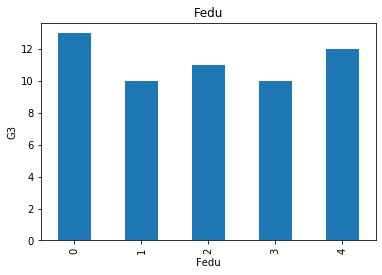

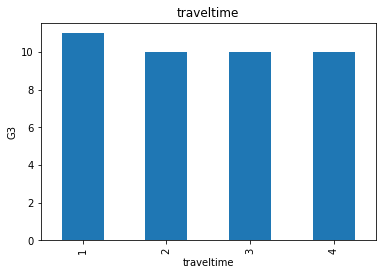

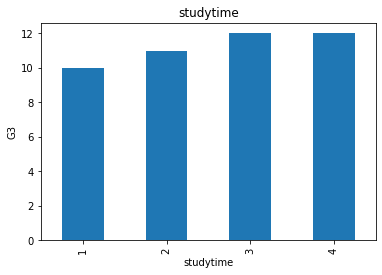

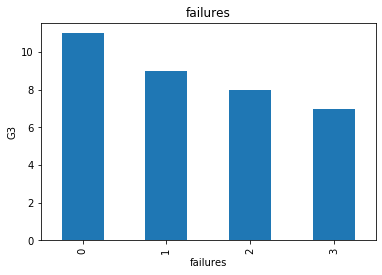

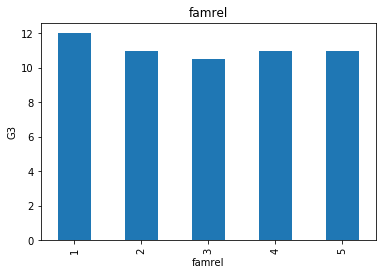

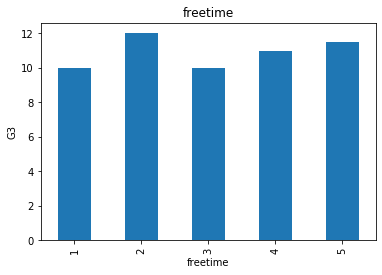

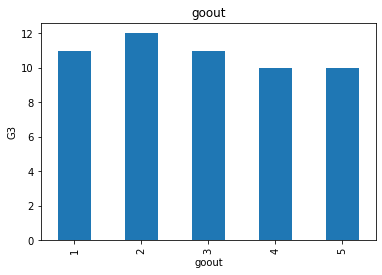

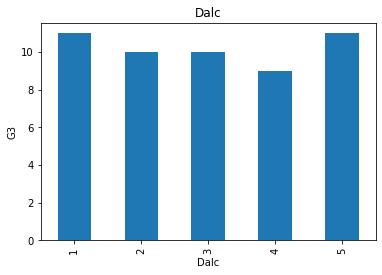

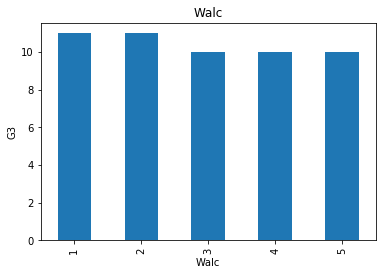

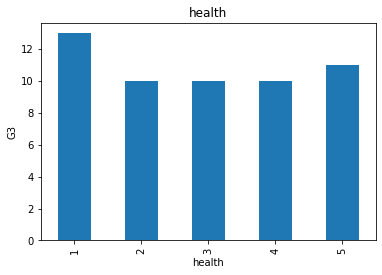

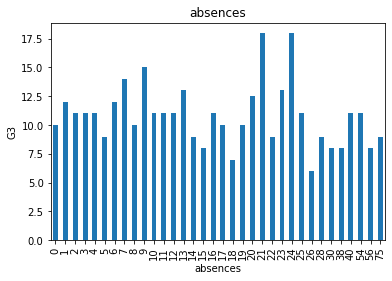

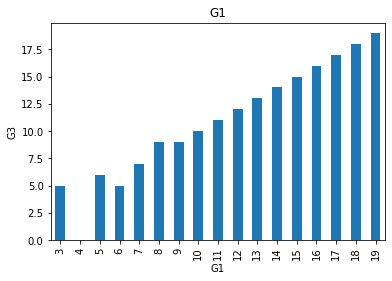

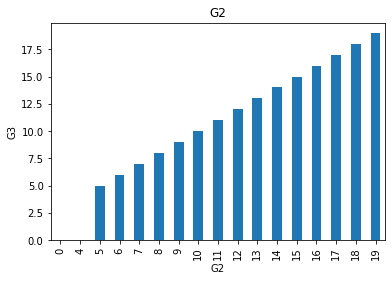

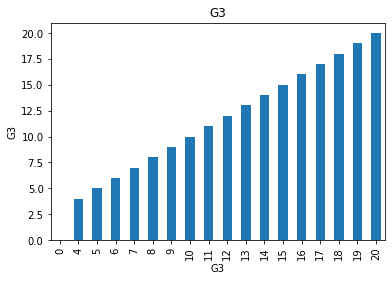

In [8]:
for feature in numerical_features:
    dataset=data.copy()
    data.groupby(feature)['G3'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel("G3")
    plt.title(feature)
    plt.show()

# Impact of Categorical Column on Final Grade G3

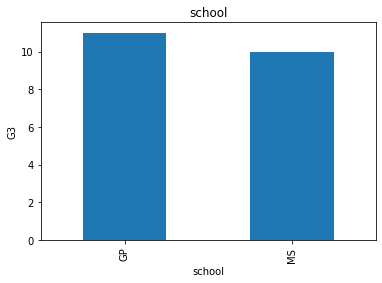

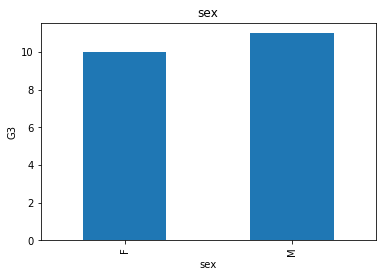

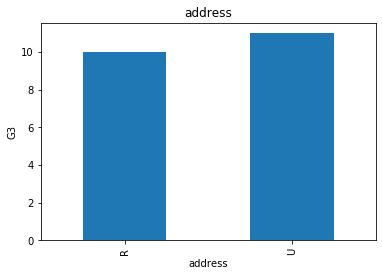

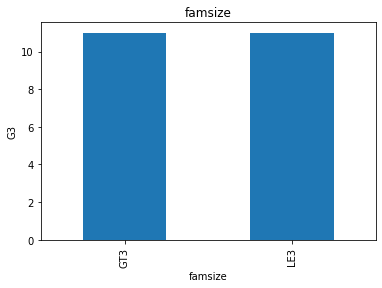

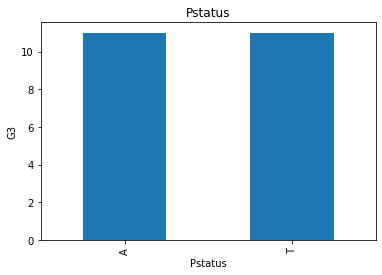

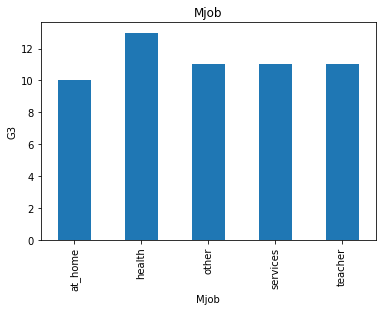

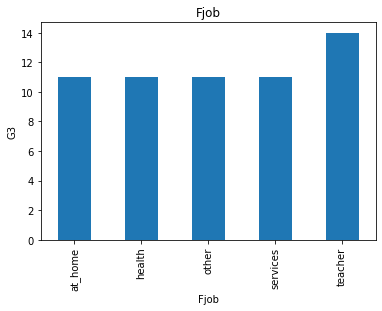

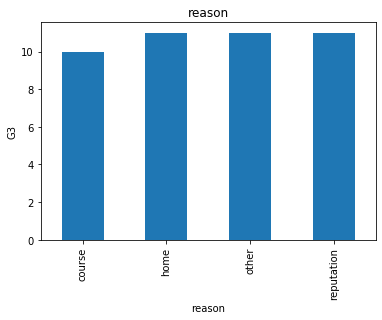

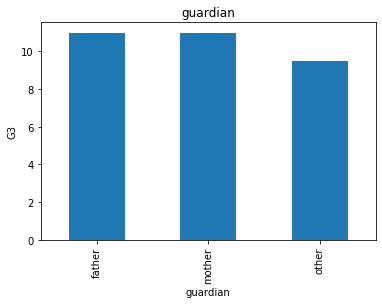

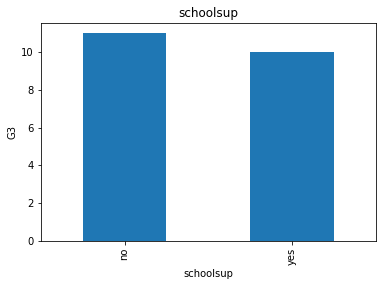

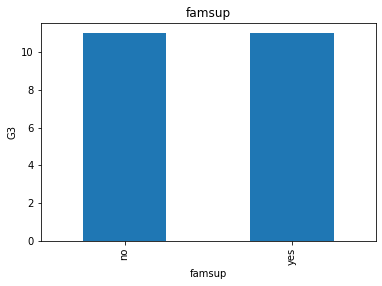

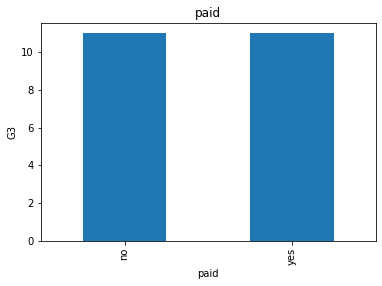

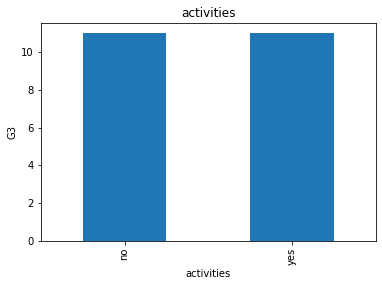

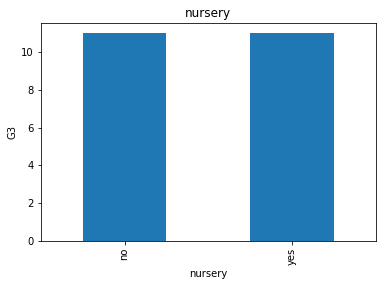

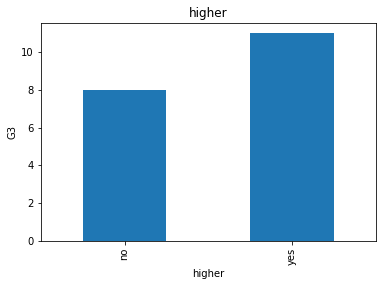

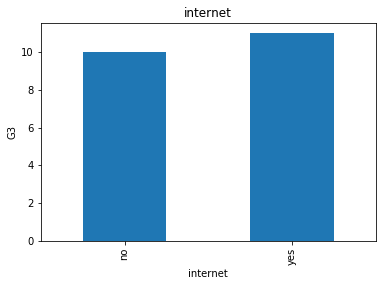

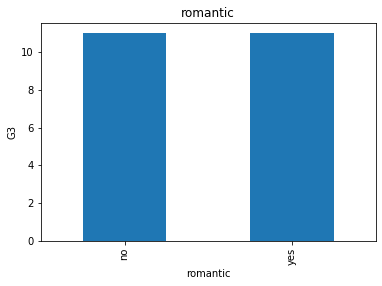

In [9]:
for feature in categorical_feature:
    dataset=data.copy()
    data.groupby(feature)["G3"].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel("G3")
    plt.title(feature)
    plt.show()

# Correlation of Independent Features with Final Grade G3

In [10]:
data.corr()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
age,1.000000,-0.163658,-0.163438,0.070641,-0.004140,0.243665,0.053940,0.016434,0.126964,0.131125,0.117276,-0.062187,0.175230,-0.064081,-0.143474,-0.161579
Medu,-0.163658,1.000000,0.623455,-0.171639,0.064944,-0.236680,-0.003914,0.030891,0.064094,0.019834,-0.047123,-0.046878,0.100285,0.205341,0.215527,0.217147
Fedu,-0.163438,0.623455,1.000000,-0.158194,-0.009175,-0.250408,-0.001370,-0.012846,0.043105,0.002386,-0.012631,0.014742,0.024473,0.190270,0.164893,0.152457
traveltime,0.070641,-0.171639,-0.158194,1.000000,-0.100909,0.092239,-0.016808,-0.017025,0.028540,0.138325,0.134116,0.007501,-0.012944,-0.093040,-0.153198,-0.117142
studytime,-0.004140,0.064944,-0.009175,-0.100909,1.000000,-0.173563,0.039731,-0.143198,-0.063904,-0.196019,-0.253785,-0.075616,-0.062700,0.160612,0.135880,0.097820
failures,0.243665,-0.236680,-0.250408,0.092239,-0.173563,1.000000,-0.044337,0.091987,0.124561,0.136047,0.141962,0.065827,0.063726,-0.354718,-0.355896,-0.360415
famrel,0.053940,-0.003914,-0.001370,-0.016808,0.039731,-0.044337,1.000000,0.150701,0.064568,-0.077594,-0.113397,0.094056,-0.044354,0.022168,-0.018281,0.051363
freetime,0.016434,0.030891,-0.012846,-0.017025,-0.143198,0.091987,0.150701,1.000000,0.285019,0.209001,0.147822,0.075733,-0.058078,0.012613,-0.013777,0.011307
goout,0.126964,0.064094,0.043105,0.028540,-0.063904,0.124561,0.064568,0.285019,1.000000,0.266994,0.420386,-0.009577,0.044302,-0.149104,-0.162250,-0.132791
Dalc,0.131125,0.019834,0.002386,0.138325,-0.196019,0.136047,-0.077594,0.209001,0.266994,1.000000,0.647544,0.077180,0.111908,-0.094159,-0.064120,-0.054660


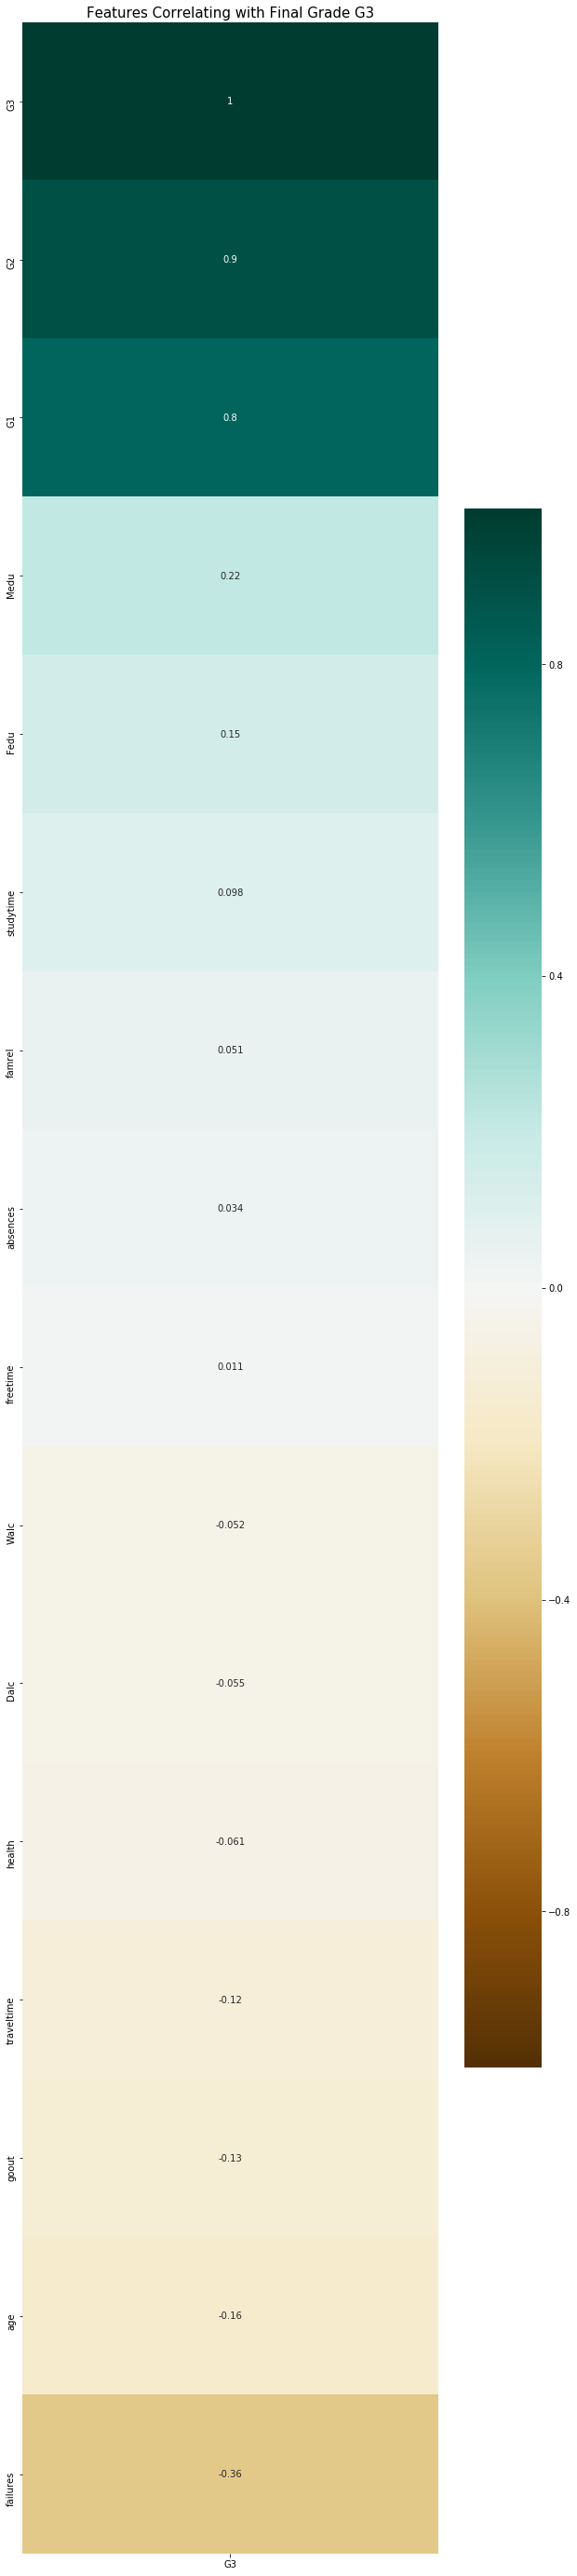

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 50))
heatmap = sns.heatmap(dataset.corr()[['G3']].sort_values(by='G3', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Final Grade G3', fontdict={'fontsize':15}, pad=5);

# Feature Engineering

# - Checking For Nulls

In [12]:
features_with_na=[features for features in data.columns if data[features].isnull().sum()]

for feature in features_with_na:
    
    print(feature,(data[feature].isnull().sum()))
    

In [13]:
data.isnull().any()

school        False
sex           False
age           False
address       False
famsize       False
Pstatus       False
Medu          False
Fedu          False
Mjob          False
Fjob          False
reason        False
guardian      False
traveltime    False
studytime     False
failures      False
schoolsup     False
famsup        False
paid          False
activities    False
nursery       False
higher        False
internet      False
romantic      False
famrel        False
freetime      False
goout         False
Dalc          False
Walc          False
health        False
absences      False
G1            False
G2            False
G3            False
dtype: bool

- No Null Data was founded in the Dataset

# Conversion of Categorical Fields to Numerical Fields

In [14]:
categorical=[features for features in data.columns if data[features].dtype=="object"]
categorical

from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()


for features in categorical:
    #label_encoder=LabelEncoder()
    data[features]=label_encoder.fit_transform(data[features])

In [15]:
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,0,18,1,0,0,4,4,0,4,0,1,2,2,0,1,0,0,0,1,1,0,0,4,3,4,1,1,3,6,5,6,6
1,0,0,17,1,0,1,1,1,0,2,0,0,1,2,0,0,1,0,0,0,1,1,0,5,3,3,1,1,3,4,5,5,6
2,0,0,15,1,1,1,1,1,0,2,2,1,1,2,3,1,0,1,0,1,1,1,0,4,3,2,2,3,3,10,7,8,10
3,0,0,15,1,0,1,4,2,1,3,1,1,1,3,0,0,1,1,1,1,1,1,1,3,2,2,1,1,5,2,15,14,15
4,0,0,16,1,0,1,3,3,2,2,1,0,1,2,0,0,1,1,0,1,1,0,0,4,3,2,1,2,5,4,6,10,10


# Splitting Data to Dependent and Independent

In [16]:
y=data[['G3']]

x=data.drop(['G3'],axis=1)

# Splitting Dataset to Train and Testing

In [17]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=15,train_size=0.80)

# Random Forest Regressor

In [18]:
from sklearn.ensemble import RandomForestRegressor
classifier = RandomForestRegressor(n_estimators=500, max_depth=7) 
classifier.fit(x_train, y_train) 

classifier.score(x_test,y_test)

C:\Users\Acer1\Anaconda4\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


0.8611244651703135

# Predictions on Test data

In [19]:
predictions = classifier.predict(x_test)
predictions

array([17.57695238, 11.77165384, 11.41088639,  8.75215717, 11.5333958 ,
       12.13149148, 11.3233266 ,  3.96699531,  4.21557859, 11.60317316,
       14.11545676, 12.25890963, 12.88735757, 15.20588913,  7.90700054,
       10.79782459,  0.632     , 12.49131752,  9.72446512, 15.05268793,
       15.54892767, 15.27084869,  9.82008674,  8.79324965,  9.33251677,
        9.55904338,  5.54135523, 17.982     , 14.06867974,  5.78796745,
       15.32098451,  9.26926408,  2.15430919,  6.58087592,  7.45268842,
        7.48854618,  9.36932733, 12.82228236,  0.521     , 12.958942  ,
        7.91027258, 10.69561952,  8.11720456,  8.18796852,  9.13804071,
       15.28398049, 10.6584044 ,  9.06876796, 10.76982972,  8.40887057,
       10.51551397, 15.18785602, 11.76658834, 18.20866667, 18.851     ,
        9.08392066,  8.24343032,  5.76019339,  9.59949395, 15.24825347,
       13.85604428, 10.93508698, 15.82127298,  9.56993173, 13.02084449,
        4.41516049,  8.18600234, 12.21157778, 11.91820317,  7.47

# Categorization Of Students On the Basis of their Final Grade
# into Well, Average and Poor Achieving 

In [24]:
def getAnalysis(score):
    if score >= 15:
        
        return 'Well Achieving'
    elif score <15 and score>=9:
        return 'Average Achieving'
    else:
        return 'Poor Achieving'
    
data["Categories"]=data["G3"].apply(getAnalysis)

In [25]:
data.head(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,Categories
0,0,0,18,1,0,0,4,4,0,4,0,1,2,2,0,1,0,0,0,1,1,0,0,4,3,4,1,1,3,6,5,6,6,Poor Achieving
1,0,0,17,1,0,1,1,1,0,2,0,0,1,2,0,0,1,0,0,0,1,1,0,5,3,3,1,1,3,4,5,5,6,Poor Achieving
2,0,0,15,1,1,1,1,1,0,2,2,1,1,2,3,1,0,1,0,1,1,1,0,4,3,2,2,3,3,10,7,8,10,Average Achieving
3,0,0,15,1,0,1,4,2,1,3,1,1,1,3,0,0,1,1,1,1,1,1,1,3,2,2,1,1,5,2,15,14,15,Well Achieving
4,0,0,16,1,0,1,3,3,2,2,1,0,1,2,0,0,1,1,0,1,1,0,0,4,3,2,1,2,5,4,6,10,10,Average Achieving


In [26]:
from sklearn.preprocessing import LabelEncoder
label_encoder =LabelEncoder()
label_encoder=LabelEncoder()
data.Categories=label_encoder.fit_transform(data.Categories)
data.head(5)


# 0 represents Average Achieving Students
# 1 represents Poor Achieving Students
# 2 Represents High Achieving Students


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,Categories
0,0,0,18,1,0,0,4,4,0,4,0,1,2,2,0,1,0,0,0,1,1,0,0,4,3,4,1,1,3,6,5,6,6,1
1,0,0,17,1,0,1,1,1,0,2,0,0,1,2,0,0,1,0,0,0,1,1,0,5,3,3,1,1,3,4,5,5,6,1
2,0,0,15,1,1,1,1,1,0,2,2,1,1,2,3,1,0,1,0,1,1,1,0,4,3,2,2,3,3,10,7,8,10,0
3,0,0,15,1,0,1,4,2,1,3,1,1,1,3,0,0,1,1,1,1,1,1,1,3,2,2,1,1,5,2,15,14,15,2
4,0,0,16,1,0,1,3,3,2,2,1,0,1,2,0,0,1,1,0,1,1,0,0,4,3,2,1,2,5,4,6,10,10,0


# Splitting Data to Test and Train

In [28]:
y=data[['Categories']]

x=data.drop(['Categories'],axis=1)

In [29]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=15,train_size=0.80)

# Random Forest Classifier

In [30]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=500, max_depth=4) 
classifier.fit(x_train, y_train) 
pred=classifier.predict(x_test)
classifier.score(x_test,y_test)

C:\Users\Acer1\Anaconda4\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


0.9746835443037974

# Classification Report

In [31]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        43
           1       1.00      0.95      0.98        21
           2       1.00      0.93      0.97        15

    accuracy                           0.97        79
   macro avg       0.99      0.96      0.97        79
weighted avg       0.98      0.97      0.97        79



# Confusion Matrix

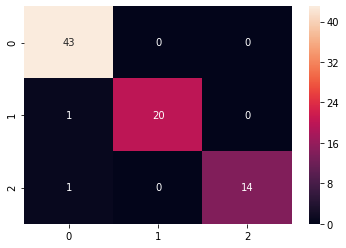

In [32]:
from sklearn.metrics import confusion_matrix

cf_matrix = confusion_matrix(y_test, pred)

import seaborn as sns
sns.heatmap(cf_matrix, annot=True)

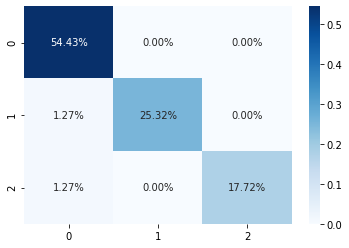

In [33]:
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')